Device: cuda
[MAE] Epoch 1/25  loss=0.1829
[MAE] Epoch 2/25  loss=0.0902
[MAE] Epoch 3/25  loss=0.0703
[MAE] Epoch 4/25  loss=0.0570
[MAE] Epoch 5/25  loss=0.0474
[MAE] Epoch 6/25  loss=0.0401
[MAE] Epoch 7/25  loss=0.0337
[MAE] Epoch 8/25  loss=0.0291
[MAE] Epoch 9/25  loss=0.0247
[MAE] Epoch 10/25  loss=0.0213
[MAE] Epoch 11/25  loss=0.0189
[MAE] Epoch 12/25  loss=0.0165
[MAE] Epoch 13/25  loss=0.0146
[MAE] Epoch 14/25  loss=0.0127
[MAE] Epoch 15/25  loss=0.0113
[MAE] Epoch 16/25  loss=0.0099
[MAE] Epoch 17/25  loss=0.0086
[MAE] Epoch 18/25  loss=0.0074
[MAE] Epoch 19/25  loss=0.0067
[MAE] Epoch 20/25  loss=0.0058
[MAE] Epoch 21/25  loss=0.0049
[MAE] Epoch 22/25  loss=0.0043
[MAE] Epoch 23/25  loss=0.0038
[MAE] Epoch 24/25  loss=0.0033
[MAE] Epoch 25/25  loss=0.0029
[MAE] Training time: 1398.87 seconds; epochs_run=25


/tmp/ipython-input-3831741860.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = x.to(device), torch.tensor(y, device=device)


[FT] Epoch 1/25  train_acc=0.3475  loss=2.1101
[FT] Epoch 2/25  train_acc=0.7662  loss=0.6902
[FT] Epoch 3/25  train_acc=0.8655  loss=0.3614
[FT] Epoch 4/25  train_acc=0.8938  loss=0.2757
[FT] Epoch 5/25  train_acc=0.9193  loss=0.2023
[FT] Epoch 6/25  train_acc=0.9330  loss=0.1553
[FT] Epoch 7/25  train_acc=0.9370  loss=0.1311
[FT] Epoch 8/25  train_acc=0.9769  loss=0.0742
[FT] Epoch 9/25  train_acc=0.9809  loss=0.0656
[FT] Epoch 10/25  train_acc=0.9499  loss=0.1469
[FT] Epoch 11/25  train_acc=0.9424  loss=0.1288
[FT] Epoch 12/25  train_acc=0.9552  loss=0.1154
[FT] Epoch 13/25  train_acc=0.9880  loss=0.0408
[FT] Epoch 14/25  train_acc=0.9916  loss=0.0265
[FT] Epoch 15/25  train_acc=0.9983  loss=0.0079
[FT] Epoch 16/25  train_acc=0.9974  loss=0.0111
[FT] Epoch 17/25  train_acc=0.9983  loss=0.0064
[FT] Epoch 18/25  train_acc=0.9996  loss=0.0022
[FT] Epoch 19/25  train_acc=0.9998  loss=0.0010
[FT] Epoch 20/25  train_acc=1.0000  loss=0.0010
[FT] Epoch 21/25  train_acc=0.9996  loss=0.0033
[

/tmp/ipython-input-3831741860.py:317: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_logits.append(logits.cpu()); all_labels.append(torch.tensor(y)); all_feats.append(feats.cpu())


Test Accuracy: 0.9837
Macro AUC (OvR): 0.9984213407139734


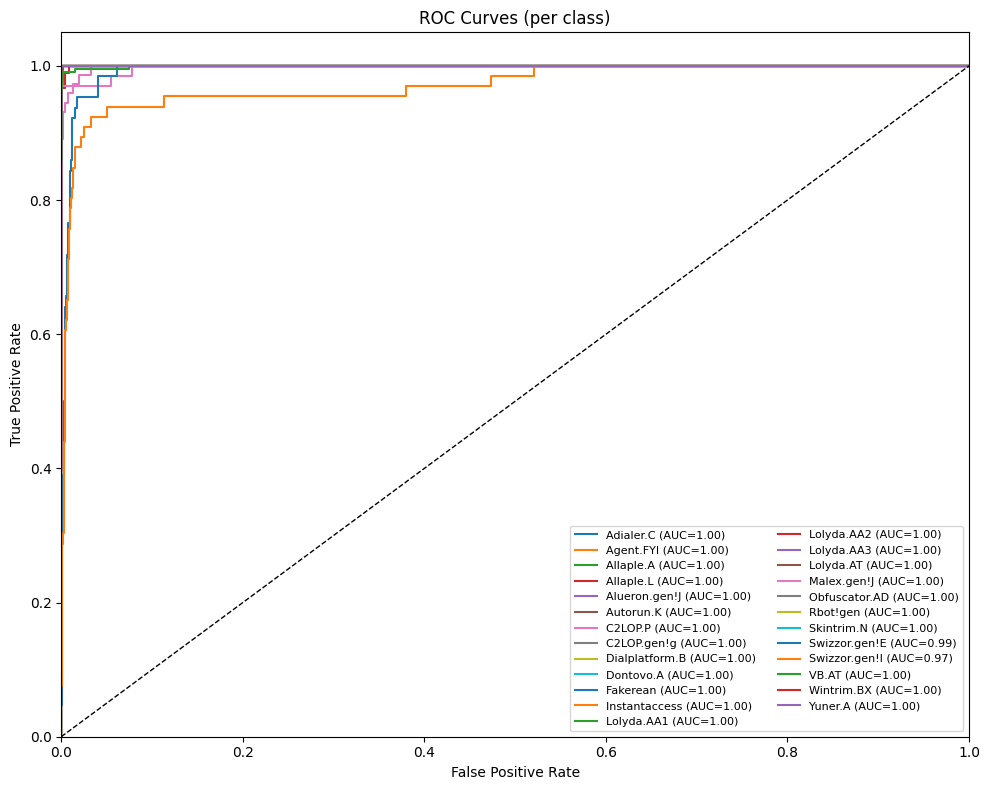

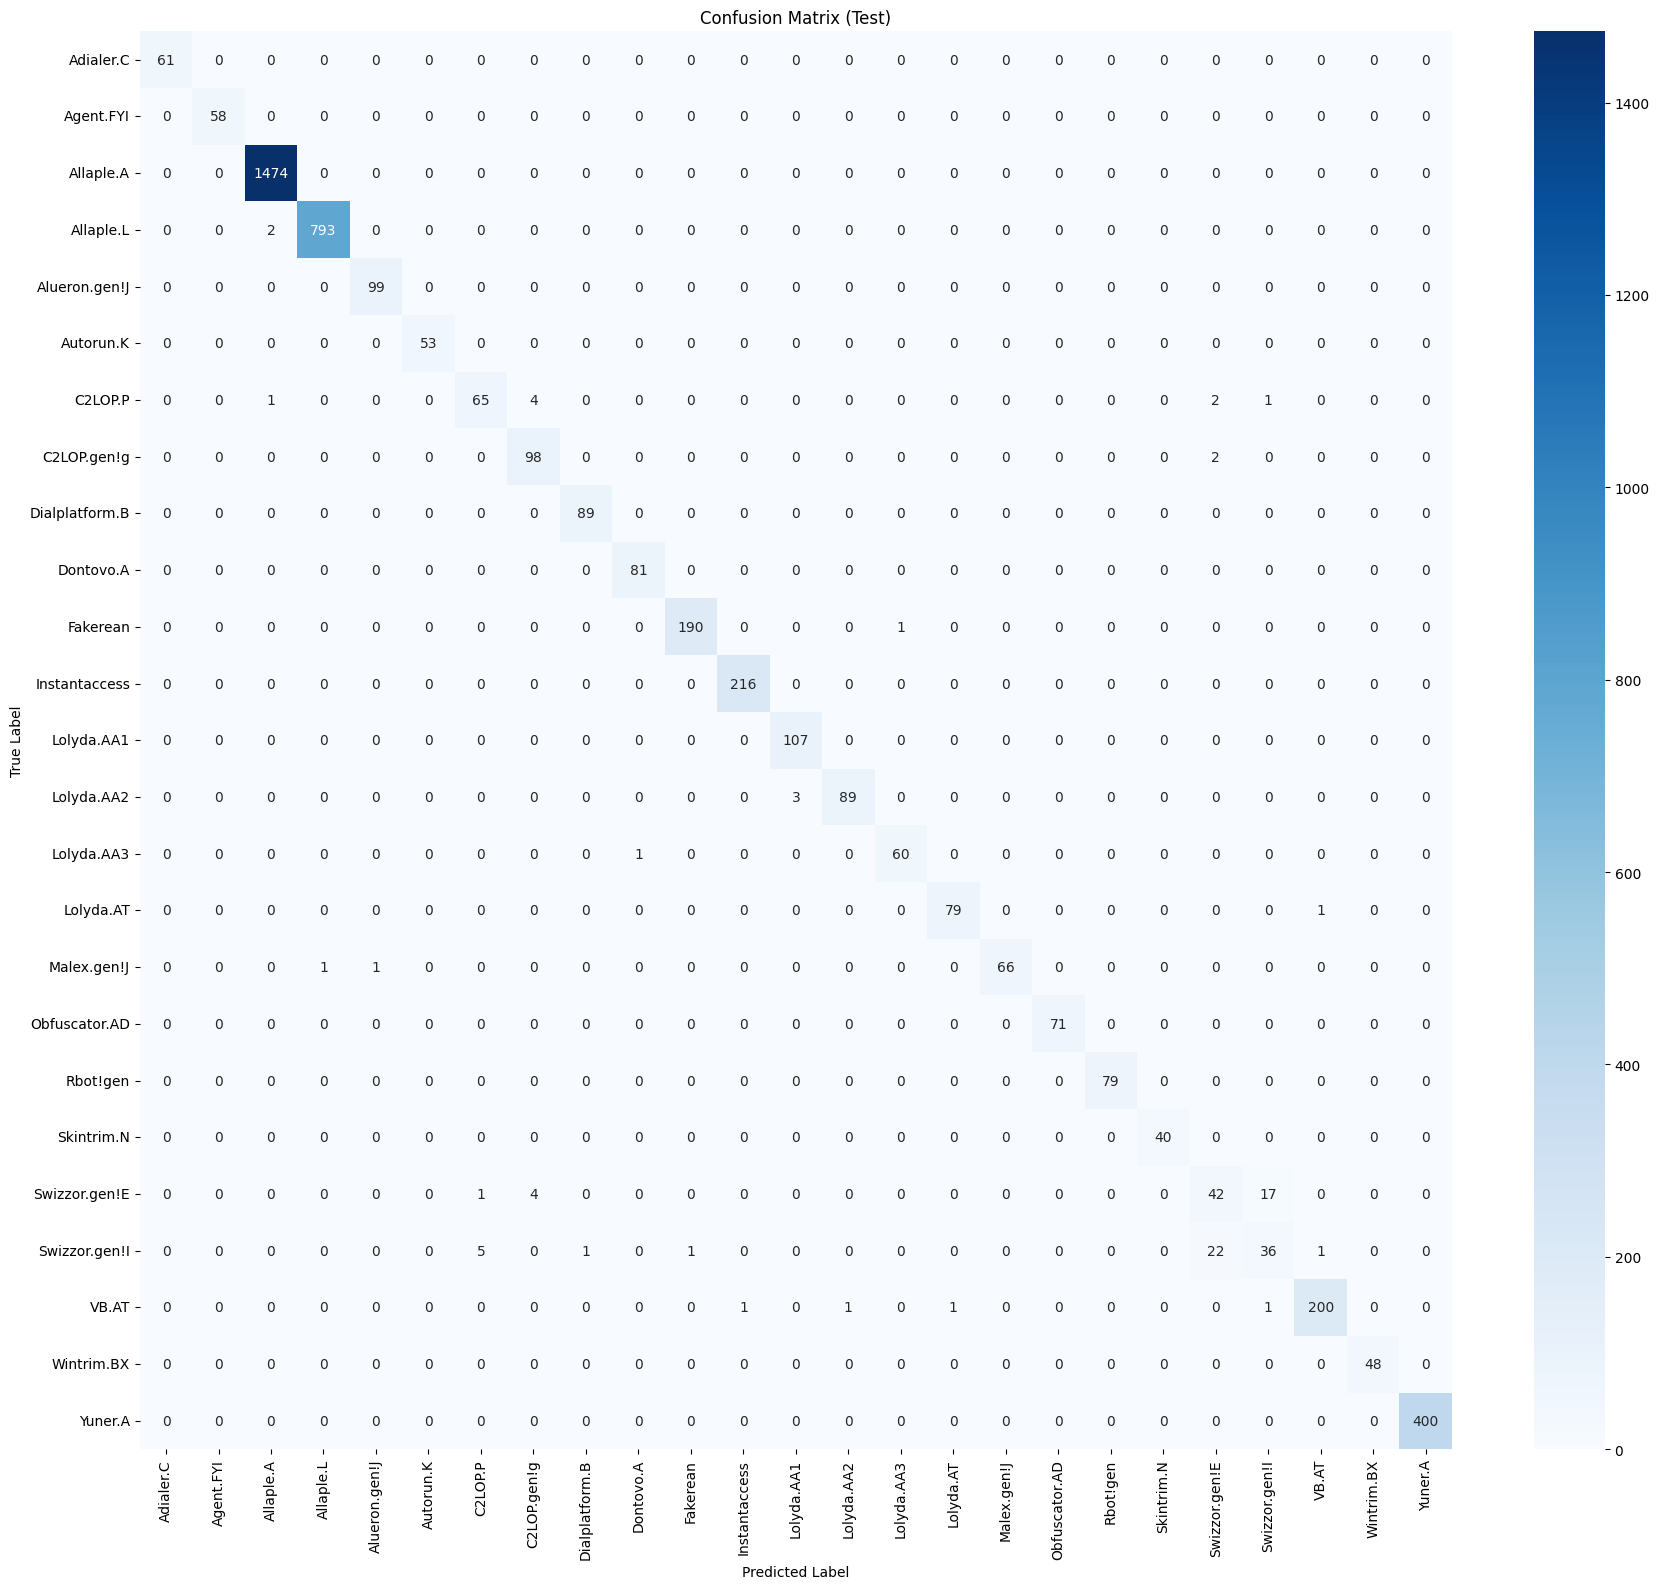

/tmp/ipython-input-3831741860.py:364: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_classes)


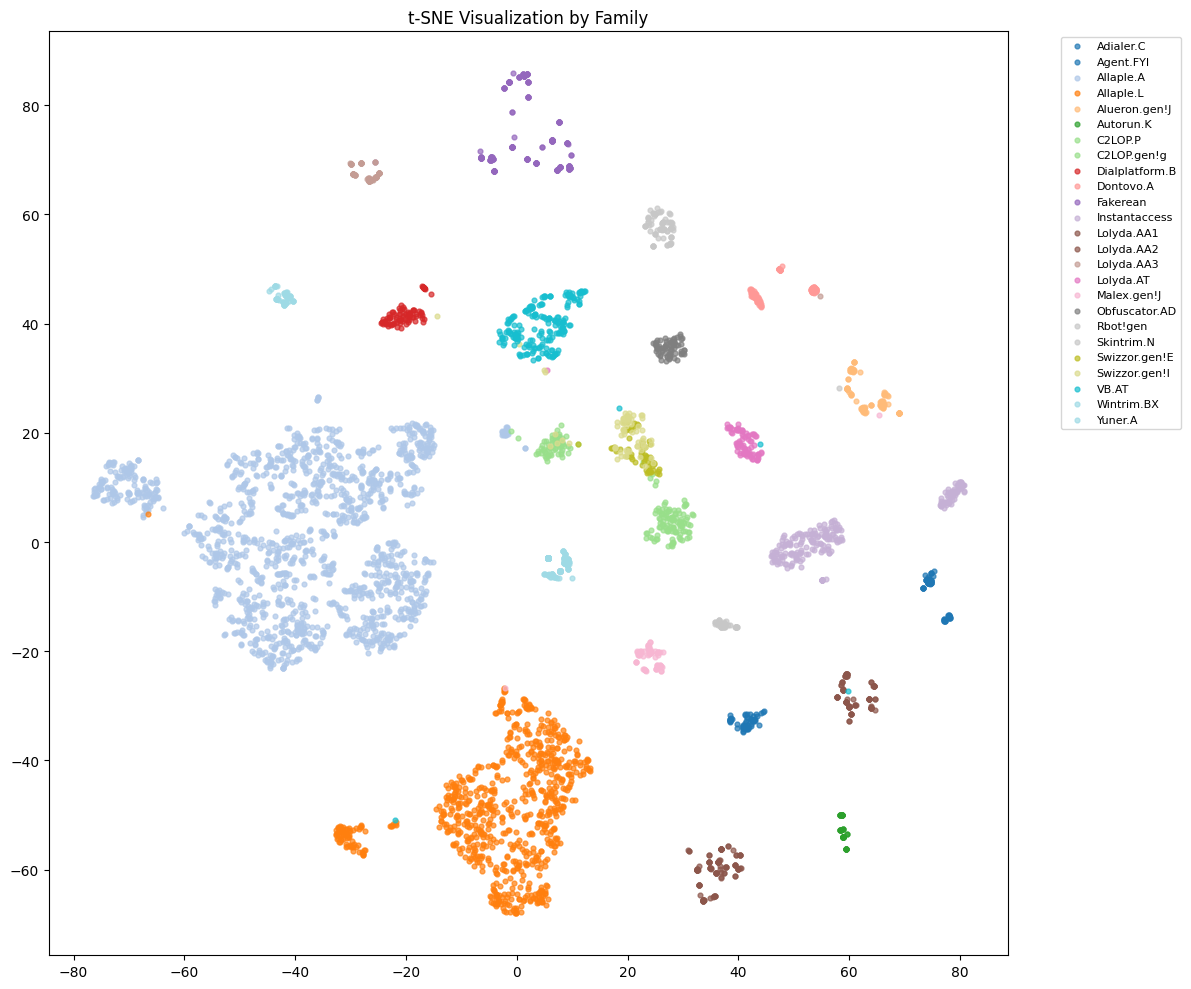

Average inference time per image: 4.684 ms

=== Classification Report ===

                precision    recall  f1-score   support

     Adialer.C     1.0000    1.0000    1.0000        61
     Agent.FYI     1.0000    1.0000    1.0000        58
     Allaple.A     0.9980    1.0000    0.9990      1474
     Allaple.L     0.9987    0.9975    0.9981       795
 Alueron.gen!J     0.9900    1.0000    0.9950        99
     Autorun.K     1.0000    1.0000    1.0000        53
       C2LOP.P     0.9155    0.8904    0.9028        73
   C2LOP.gen!g     0.9245    0.9800    0.9515       100
Dialplatform.B     0.9889    1.0000    0.9944        89
     Dontovo.A     0.9878    1.0000    0.9939        81
      Fakerean     0.9948    0.9948    0.9948       191
 Instantaccess     0.9954    1.0000    0.9977       216
    Lolyda.AA1     0.9727    1.0000    0.9862       107
    Lolyda.AA2     0.9889    0.9674    0.9780        92
    Lolyda.AA3     0.9836    0.9836    0.9836        61
     Lolyda.AT     0.9875   

In [4]:
#!/usr/bin/env python3
"""
Kaggle Notebook Version: SHERLOCK-style (Self-Supervised ViT with Masked Autoencoder)
for Malimg Family Classification (25 classes).

Pipeline:
1. Load Malimg dataset (organized as /kaggle/input/malimg-dataset/Malimg/<family_name>/...)
2. Convert grayscale to RGB (3 channels).
3. Stratified split → train / test.
4. Self-supervised pretraining with MAE (ViT encoder) + Early Stopping.
5. Fine-tuning classifier for 25 family classes + Early Stopping.
6. Evaluation: AUC-ROC, confusion matrix, t-SNE, test accuracy, avg inference time.

Outputs saved under /kaggle/working/malimg_run1/:
- mae_encoder.pt (encoder weights)
- best_model.pt (fine-tuned classifier)
- metrics.json (macro AUC + classification report + test accuracy + avg inference ms)
- train_times.json (timings + epochs actually run)
"""

# ------------------------------
# User Config (Kaggle)
# ------------------------------
DATA_ROOT = "/content/drive/MyDrive/Colab Notebooks/malimg_paper_dataset_imgs"   # dataset path
OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/Mae-vit"          # save outputs here

IMG_SIZE = 224
BATCH_SIZE = 128
MAE_EPOCHS = 25    # self-supervised pretraining epochs
FT_EPOCHS  = 25   # fine-tuning epochs
LR_MAE = 1e-4
LR_FT  = 1e-4
SEED = 42

# Early Stopping settings
ES_PATIENCE_MAE = 5          # patience for MAE (by lowest recon loss)
ES_PATIENCE_FT  = 10         # patience for FT (by lowest CE train loss)
ES_MIN_DELTA    = 1e-4       # minimal improvement to reset patience


# ------------------------------
# Imports
# ------------------------------
import os, json, random, time
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import timm


# ------------------------------
# Utilities
# ------------------------------
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# ------------------------------
# Dataset
# ------------------------------
IMG_EXTS = (".png", ".jpg", ".jpeg", ".bmp")

def find_images(root: str):
    root = Path(root)
    classes = sorted([d.name for d in root.iterdir() if d.is_dir()])
    class_to_idx = {c: i for i, c in enumerate(classes)}
    paths, labels = [], []
    for c in classes:
        for p in (root / c).rglob("*"):
            if p.suffix.lower() in IMG_EXTS:
                paths.append(str(p))
                labels.append(class_to_idx[c])
    return paths, labels, classes

class MalimgDataset(Dataset):
    def __init__(self, paths, labels, img_size=224):
        self.paths = paths
        self.labels = labels
        self.tfm = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.Lambda(lambda im: im.convert('RGB')),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        p = self.paths[idx]
        y = self.labels[idx]
        im = Image.open(p).convert('L')
        x = self.tfm(im)
        return x, y

# ------------------------------
# MAE components
# ------------------------------
class PatchMasker:
    def __init__(self, mask_ratio=0.75):
        self.mask_ratio = mask_ratio
    def __call__(self, x):
        B, N, D = x.shape
        len_keep = int(N * (1 - self.mask_ratio))
        noise = torch.rand(B, N, device=x.device)
        ids_shuffle = torch.argsort(noise, dim=1)
        ids_restore = torch.argsort(ids_shuffle, dim=1)
        ids_keep = ids_shuffle[:, :len_keep]
        x_keep = torch.gather(x, 1, ids_keep.unsqueeze(-1).expand(-1, -1, D))
        mask = torch.ones([B, N], device=x.device)
        mask[:, :len_keep] = 0
        mask = torch.gather(mask, 1, ids_restore)
        return x_keep, ids_restore, mask

class MAEDecoder(nn.Module):
    def __init__(self, embed_dim=768, decoder_dim=512, patch_dim=768, depth=4, num_heads=8):
        super().__init__()
        self.enc2dec = nn.Linear(embed_dim, decoder_dim, bias=False)
        layer = nn.TransformerEncoderLayer(d_model=decoder_dim, nhead=num_heads, batch_first=True)
        self.tr = nn.TransformerEncoder(layer, num_layers=depth)
        self.mask_token = nn.Parameter(torch.zeros(1, 1, decoder_dim))
        self.pred = nn.Linear(decoder_dim, patch_dim)
        nn.init.normal_(self.mask_token, std=0.02)
    def forward(self, x_vis, ids_restore):
        B, _, D_enc = x_vis.shape
        x = self.enc2dec(x_vis)
        B, N, D_dec = ids_restore.shape[0], ids_restore.shape[1], x.shape[-1]
        mask_tokens = self.mask_token.repeat(B, N - x.shape[1], 1)
        x_ = torch.cat([x, mask_tokens], dim=1)
        x_ = torch.gather(x_, 1, ids_restore.unsqueeze(-1).expand(-1, -1, D_dec))
        x_ = self.tr(x_)
        pred = self.pred(x_)
        return pred

class MAE(nn.Module):
    def __init__(self, img_size=224, patch_size=16, embed_dim=768, mask_ratio=0.75):
        super().__init__()
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=0, img_size=img_size)
        self.patch_embed = self.encoder.patch_embed
        self.cls_token = self.encoder.cls_token
        self.pos_embed = self.encoder.pos_embed
        self.blocks = self.encoder.blocks
        self.norm = self.encoder.norm
        self.masker = PatchMasker(mask_ratio)
        self.decoder = MAEDecoder(embed_dim=embed_dim, decoder_dim=512, patch_dim=embed_dim)
    def forward(self, x):
        # patch embedding: [B, num_patches, embed_dim]
        x = self.patch_embed(x)
        B, N, D = x.shape

        # masking
        x_vis, ids_restore, mask = self.masker(x)

        # add class token + positional embeddings
        cls_tok = self.cls_token.expand(B, -1, -1)
        pos = self.pos_embed[:, 1:, :]
        pos_vis, _, _ = self.masker(pos.expand(B, -1, -1))

        x_enc = torch.cat([cls_tok, x_vis + pos_vis], 1)
        for blk in self.blocks:
            x_enc = blk(x_enc)
        x_enc = self.norm(x_enc)

        x_enc_patches = x_enc[:, 1:, :]

        # reconstruct
        pred = self.decoder(x_enc_patches, ids_restore)

        # loss
        loss = (pred - x).pow(2).mean(-1)
        loss = (loss * mask).sum() / mask.sum()
        return loss

    def encoder_only(self): return self.encoder

# ------------------------------
# Classifier
# ------------------------------
class ViTClassifier(nn.Module):
    def __init__(self, encoder, num_classes):
        super().__init__()
        self.encoder = encoder
        self.head = nn.Linear(self.encoder.num_features, num_classes)
    def forward(self, x):
        feats = self.encoder(x)
        logits = self.head(feats)
        return logits, feats

# ------------------------------
# Train functions (with Early Stopping)
# ------------------------------
def train_mae(model, loader, epochs, device, lr=1e-4, patience=5, min_delta=1e-4):
    model.train()
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.05)
    start_time = time.perf_counter()

    best_loss = float('inf')
    no_improve = 0
    epochs_run = 0

    for ep in range(epochs):
        total = 0.0
        n_samples = 0
        for x, _ in loader:
            x = x.to(device)
            loss = model(x)
            opt.zero_grad(); loss.backward(); opt.step()
            total += loss.item() * x.size(0)
            n_samples += x.size(0)
        epoch_loss = total / max(n_samples, 1)
        print(f"[MAE] Epoch {ep+1}/{epochs}  loss={epoch_loss:.4f}")

        # Early stopping (minimize loss)
        if epoch_loss < best_loss - min_delta:
            best_loss = epoch_loss
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"[MAE] Early stopping at epoch {ep+1} (best loss {best_loss:.4f})")
                epochs_run = ep + 1
                break
        epochs_run = ep + 1

    if torch.cuda.is_available():
        torch.cuda.synchronize()
    elapsed = time.perf_counter() - start_time
    print(f"[MAE] Training time: {elapsed:.2f} seconds; epochs_run={epochs_run}")
    return elapsed, epochs_run, best_loss

def train_finetune(model, train_loader, epochs, device, lr=1e-4, patience=10, min_delta=1e-4):
    criterion = nn.CrossEntropyLoss()
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.05)

    best_train_acc = 0.0
    best_state_by_loss = None
    best_loss = float('inf')
    no_improve = 0
    epochs_run = 0

    start_time = time.perf_counter()
    for ep in range(epochs):
        model.train()
        correct = total = 0
        total_loss = 0.0

        for x, y in train_loader:
            x, y = x.to(device), torch.tensor(y, device=device)
            logits, _ = model(x)
            loss = criterion(logits, y)
            opt.zero_grad(); loss.backward(); opt.step()

            total_loss += loss.item() * y.size(0)
            pred = logits.argmax(1)
            correct += (pred == y).sum().item()
            total += y.size(0)

        train_acc = correct / max(total, 1)
        epoch_loss = total_loss / max(total, 1)
        print(f"[FT] Epoch {ep+1}/{epochs}  train_acc={train_acc:.4f}  loss={epoch_loss:.4f}")

        # Track best acc (for logging)
        if train_acc > best_train_acc:
            best_train_acc = train_acc

        # Early stopping on lowest training loss
        if epoch_loss < best_loss - min_delta:
            best_loss = epoch_loss
            no_improve = 0
            # store model snapshot on improvement
            best_state_by_loss = {k: v.cpu() for k, v in model.state_dict().items()}
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"[FT] Early stopping at epoch {ep+1} (best train loss {best_loss:.4f})")
                epochs_run = ep + 1
                break
        epochs_run = ep + 1

    # Restore best (lowest-loss) weights if available
    if best_state_by_loss:
        model.load_state_dict(best_state_by_loss)

    if torch.cuda.is_available():
        torch.cuda.synchronize()
    elapsed = time.perf_counter() - start_time
    print(f"[FT] Training time: {elapsed:.2f} seconds (best_train_acc={best_train_acc:.4f}; best_train_loss={best_loss:.4f}; epochs_run={epochs_run})")
    return model, best_train_acc, elapsed, epochs_run, best_loss

def evaluate(model, loader, device, num_classes, class_names, out_dir:Path):
    model.eval(); all_logits, all_labels, all_feats=[],[],[]
    total_infer_time = 0.0
    total_samples = 0
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device)
            # measure inference time
            t0 = time.perf_counter()
            logits, feats = model(x)
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            dt = time.perf_counter() - t0
            total_infer_time += dt
            total_samples += x.size(0)

            all_logits.append(logits.cpu()); all_labels.append(torch.tensor(y)); all_feats.append(feats.cpu())
    logits=torch.cat(all_logits,0); labels=torch.cat(all_labels,0); feats=torch.cat(all_feats,0)
    probs=F.softmax(logits,1).numpy(); y_true=labels.numpy()
    y_onehot=np.zeros((y_true.size,num_classes)); y_onehot[np.arange(y_true.size),y_true]=1
    auc_macro=roc_auc_score(y_onehot,probs,average='macro',multi_class='ovr')

    # === Test Accuracy ===
    y_pred = probs.argmax(1)
    test_acc = (y_pred == y_true).mean()
    print(f"Test Accuracy: {test_acc:.4f}")

    # === Print AUC-ROC ===
    print("Macro AUC (OvR):", auc_macro)
    from sklearn.metrics import roc_curve, auc

    # === ROC Curves per Class ===
    plt.figure(figsize=(10,8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_onehot[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1.5, label=f"{class_names[i]} (AUC={roc_auc:.2f})")
    plt.plot([0,1], [0,1], 'k--', lw=1)
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (per class)")
    plt.legend(loc="lower right", fontsize=8, ncol=2)
    plt.tight_layout()
    plt.show()

    # === Confusion Matrix with Seaborn ===
    cm=confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(18,16))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=class_names, yticklabels=class_names,
        cbar=True
    )
    plt.title("Confusion Matrix (Test)")
    plt.xlabel("Predicted Label"); plt.ylabel("True Label")
    plt.xticks(rotation=90); plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    import matplotlib.cm as cm
    # === t-SNE Visualization with all Families ===
    tsne = TSNE(n_components=2, random_state=42).fit_transform(feats.numpy())
    plt.figure(figsize=(12,10))
    colors = cm.get_cmap('tab20', num_classes)
    for i in range(num_classes):
        idx = (y_true == i)
        plt.scatter(tsne[idx,0], tsne[idx,1], s=12, color=colors(i), label=class_names[i], alpha=0.7)
    plt.title("t-SNE Visualization by Family")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.tight_layout()
    plt.show()

    # === Inference Time ===
    avg_infer_ms = (total_infer_time / max(total_samples,1)) * 1000.0
    print(f"Average inference time per image: {avg_infer_ms:.3f} ms")

    # === Classification Report + Metrics JSON ===
    report=classification_report(y_true,y_pred,target_names=class_names,digits=4,zero_division=0)
    metrics={
        'auc_macro_ovr':float(auc_macro),
        'num_classes':num_classes,
        'samples':int(y_true.size),
        'test_accuracy':float(test_acc),
        'avg_infer_ms_per_image':float(avg_infer_ms),
        'classification_report':report
    }
    with open(out_dir/'metrics.json','w') as f: json.dump(metrics,f,indent=2)
    print("\n=== Classification Report ===\n")
    print(report)
    print("Evaluation complete. Metrics saved.")


# ------------------------------
# Main for Kaggle
# ------------------------------
def stratified_split_train_test(paths, labels, train_size=0.8, seed=42):
    """Two-way stratified split: train/test."""
    sss=StratifiedShuffleSplit(n_splits=1,test_size=(1-train_size),random_state=seed)
    idx=np.arange(len(paths))
    train_idx, test_idx = next(sss.split(idx, labels))
    return train_idx, test_idx

def make_weighted_sampler(train_labels, num_classes):
    """Create a WeightedRandomSampler to handle class imbalance."""
    counts = np.bincount(train_labels, minlength=num_classes)
    class_weights = np.zeros_like(counts, dtype=np.float32)
    nonzero = counts > 0
    class_weights[nonzero] = 1.0 / counts[nonzero]
    sample_weights = class_weights[np.array(train_labels)]
    sample_weights = torch.from_numpy(sample_weights).float()
    return WeightedRandomSampler(weights=sample_weights,
                                 num_samples=len(train_labels),
                                 replacement=True)

def main_kaggle():
    seed_everything(SEED)
    out_dir=Path(OUTPUT_DIR); out_dir.mkdir(parents=True,exist_ok=True)
    device='cuda' if torch.cuda.is_available() else 'cpu'; print('Device:',device)

    # === Data ===
    paths,labels,classes=find_images(DATA_ROOT)
    train_idx,test_idx=stratified_split_train_test(paths,labels,train_size=0.5,seed=SEED)
    def subset(lst,idx): return [lst[i] for i in idx]
    train_paths, train_labels = subset(paths,train_idx), subset(labels,train_idx)
    test_paths,  test_labels  = subset(paths,test_idx),  subset(labels,test_idx)

    train_set=MalimgDataset(train_paths, train_labels, IMG_SIZE)
    test_set =MalimgDataset(test_paths,  test_labels,  IMG_SIZE)

    # === Weighted Samplers for training (MAE & FT) ===
    sampler = make_weighted_sampler(train_labels, num_classes=len(classes))

    train_loader_mae=DataLoader(train_set,batch_size=BATCH_SIZE,sampler=sampler,shuffle=False)
    train_loader=DataLoader(train_set,batch_size=BATCH_SIZE,sampler=sampler,shuffle=False)
    test_loader=DataLoader(test_set,batch_size=BATCH_SIZE,shuffle=False)

    # === MAE Pretraining (with Early Stopping) ===
    mae=MAE(img_size=IMG_SIZE,patch_size=16,embed_dim=768,mask_ratio=0.75).to(device)
    mae_time = 0.0
    mae_epochs_run = 0
    mae_best_loss = None
    if MAE_EPOCHS>0:
        mae_time, mae_epochs_run, mae_best_loss = train_mae(
            mae, train_loader_mae, MAE_EPOCHS, device, LR_MAE,
            patience=ES_PATIENCE_MAE, min_delta=ES_MIN_DELTA
        )
        torch.save(mae.encoder.state_dict(),out_dir/'mae_encoder.pt')

    # === Fine-tuning (with Early Stopping) ===
    encoder=mae.encoder
    model=ViTClassifier(encoder,num_classes=len(classes)).to(device)
    model,best_train_acc, ft_time, ft_epochs_run, best_train_loss = train_finetune(
        model, train_loader, FT_EPOCHS, device, LR_FT,
        patience=ES_PATIENCE_FT, min_delta=ES_MIN_DELTA
    )
    torch.save(model.state_dict(),out_dir/'best_model.pt')

    # Log training times + epochs actually run
    times_log = {
        "mae_train_seconds": float(mae_time),
        "mae_epochs_run": int(mae_epochs_run),
        "mae_best_loss": float(mae_best_loss) if mae_best_loss is not None else None,
        "finetune_train_seconds": float(ft_time),
        "finetune_epochs_run": int(ft_epochs_run),
        "best_train_accuracy": float(best_train_acc),
        "best_train_loss": float(best_train_loss)
    }
    with open(out_dir/'train_times.json','w') as f:
        json.dump(times_log, f, indent=2)
    print(f"Saved training times to {out_dir/'train_times.json'}")

    # === Evaluation (Test) ===
    evaluate(model,test_loader,device,len(classes),classes,out_dir)

# Run in Kaggle Notebook:
main_kaggle()
